In [3]:
import json
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
import matplotlib.colors as colors

from viz_neutronics.input2json import parse_text_to_dict, save_to_json, stringTuple_to_array, dict2obj

In [4]:
inputFile = 'SimplePin_MC'
output_file = 'SimplePin_MC_output.json'

# returns output JSON object as python dictionary
with open(output_file) as f:
    outputDict = json.load(f)

output = dict2obj(outputDict)

pinFiss = output.active.pinFiss

# pin space map

pinResults =np.array(pinFiss.Res).T
pinResults_std = pinResults[1,0].T
pinResults_values = pinResults[0,0].T
x_coordsPin = np.array(pinFiss.XBounds).T
y_coordsPin = np.array(pinFiss.YBounds).T
x_coords_averagedPin =  (x_coordsPin[0,:] + x_coordsPin[1,:]) / 2
y_coords_averagedPin =  (y_coordsPin[0,:] + y_coordsPin[1,:]) / 2



# combined energy-space map in x
energyX_pin = np.sum(np.array(output.active.pinFiss.Res).T, axis=(0,1,3)).T


# SCALING reaction rates by volume
# volume of one unit
deltaX = abs(x_coords_averagedPin[1] - x_coords_averagedPin[0])
deltaY = abs(y_coords_averagedPin[1] - y_coords_averagedPin[0])
unitVol_pin = deltaX * deltaY * 1 # cm in z




shannonEntropy = np.array(output.inactive.shannon.shannonEntropy)



In [5]:
# read in k_eff
[keff, keff_std] =output.keff.K_EFF
print(keff)

1.23845


In [6]:
# read in scattering outputs

scatteringMatrix = output.active.scatteringMatrices

capture = scatteringMatrix.capture
fission = scatteringMatrix.fission
transportFluxLimited = scatteringMatrix.transportFluxLimited
transportOutScatter = scatteringMatrix.transportOutScatter
nu = scatteringMatrix.nu
chi = scatteringMatrix.chi
P0 = scatteringMatrix.P0
P1 = scatteringMatrix.P1
P2 = scatteringMatrix.P2
P3 = scatteringMatrix.P3
P4 = scatteringMatrix.P4
P5 = scatteringMatrix.P5
P6 = scatteringMatrix.P6
P7 = scatteringMatrix.P7
prod = scatteringMatrix.prod
# print(capture)

print(P0)


[[0.392447, 8.73744e-05], [0.031366, 6.49065e-06], [1.96102e-06, 5.84518e-08], [0.0, 0.0], [0.747136, 0.000232724], [0.0692972, 2.94098e-05], [0.0, 0.0], [0.143148, 0.000118855], [1.22658, 0.000969927]]


In [7]:
# read in inputs

inputDict = parse_text_to_dict(inputFile)
save_to_json(inputDict, 'input.json')
input = dict2obj(inputDict)

activeCyles = input.active
inactiveCycles = input.inactive
print(activeCyles, 'active cycles')



1000 active cycles


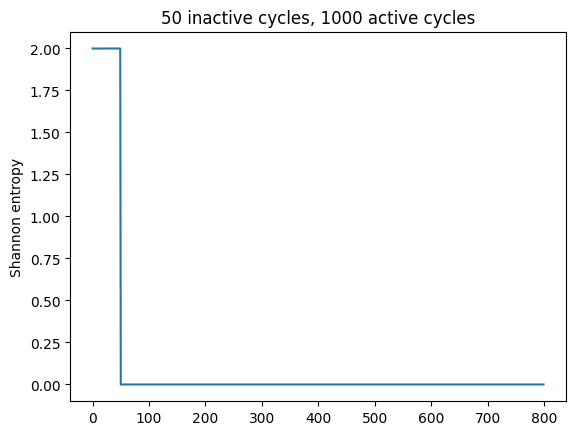

In [8]:
fig, ax = plot.subplots()
ax.plot(shannonEntropy[:inactiveCycles+activeCyles])
ax.set_ylabel('Shannon entropy')
plot.title(str(inactiveCycles) + ' inactive cycles, ' + str(activeCyles) + ' active cycles')
plot.show()

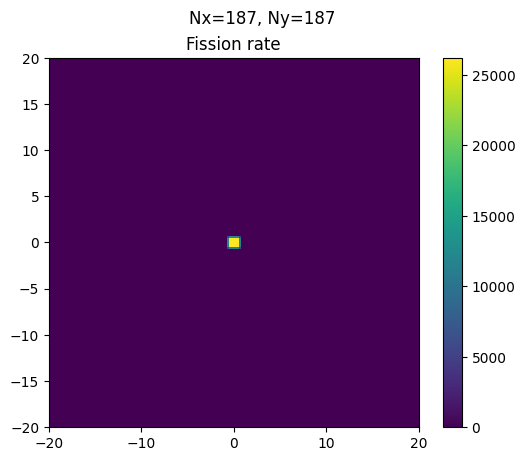

In [9]:
# Plot fission results
fig, ax1 = plot.subplots()
val = ax1.pcolormesh( x_coords_averagedPin, y_coords_averagedPin, pinResults_values)#/ unitVol_pin)
# val2 = ax2.contourf( x_coords_averagedPin, y_coords_averagedPin, pinResults_values / unitVol_pin)
# val2 = ax2.imshow( fissionResults_values)

# flux plot, separate into fast and thermal (1eV)

ax1.set_title('Fission rate')
# ax2.set_title('contourf')
ax1.set_aspect('equal')
# ax2.set_aspect('equal')
# ax3.set_title('imshow')
fig.colorbar(val)
fig.suptitle("Nx={:.0f}, Ny={:.0f}".format(len(x_coords_averagedPin), len(y_coords_averagedPin)))

plot.show()

(187, 187)


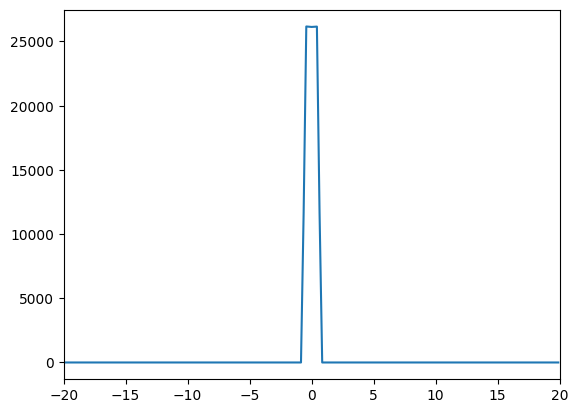

inf


/tmp/ipykernel_356692/7859647.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  print(pinResults_line[93]/pinResults_line[0])


In [10]:
### line plot

# print(x_coords_averagedPin[-20:])
print(pinResults_values.shape)
line_x = x_coords_averagedPin
line_y = np.zeros(len(x_coords_averagedPin))
y_index = round((len(y_coords_averagedPin)-1)/2)
x_index = np.arange(0,len(x_coords_averagedPin))
pinResults_line = pinResults_values[y_index, x_index]
pinResults_line = pinResults_values[y_index, x_index]


fig, ax = plot.subplots()
ax.plot(line_x, pinResults_line)
ax.set_xbound(-20, 20)
plot.show()

print(pinResults_line[93]/pinResults_line[0])